### 01 Importing Libraries

### 02 Importing Data

### 03 Drop columns due to security implications

### 04 Regional Segmentation

### 05 Exclusion flag for low-activity customers

### 06 Age group profile

### 07 Income profile

### 08 Department profile

### 09 Family status profile

### 10 Product price range

### 11 Loyalty groups

### 12 Order frequency

### 13 Spending groups 

# 01 Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Importing Data

In [2]:
#defining path
path = r'C:\Users\gullo\OneDrive\Desktop\Career_Foundry\Data Immersion\A4- Python Fundamentals for Data Analysts\Instacart Basket Analysis'

In [3]:
# Check path
path

'C:\\Users\\gullo\\OneDrive\\Desktop\\Career_Foundry\\Data Immersion\\A4- Python Fundamentals for Data Analysts\\Instacart Basket Analysis'

In [4]:
# Import cust_orders_products_merged_Task_4_9 dataset
cust_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_updated_4_9.pkl'))

In [5]:
cust_ords_prods_merge.head()

user_id    first      last  gender     state  age date_joined  \
0   26711  Deborah  Esquivel  Female  Missouri   48    1/1/2017   
1   26711  Deborah  Esquivel  Female  Missouri   48    1/1/2017   
2   26711  Deborah  Esquivel  Female  Missouri   48    1/1/2017   
3   26711  Deborah  Esquivel  Female  Missouri   48    1/1/2017   
4   26711  Deborah  Esquivel  Female  Missouri   48    1/1/2017   

   number_of_dependants marital_status  income  ...  prices     busiest_day  \
0                     3        married  165665  ...     9.0  Regularly busy   
1                     3        married  165665  ...     9.0  Regularly busy   
2                     3        married  165665  ...     9.0  Regularly busy   
3                     3        married  165665  ...    12.6  Regularly busy   
4                     3        married  165665  ...    12.6  Regularly busy   

     busiest_days  busiest_period_of_day  max_order  loyalty_flag  \
0    Busiest days         Average orders          8  New customer   
1  Regularly days            Most orders          8  New customer   
2    Busiest days            Most orders          8  New customer   
3  Regularly days         Average orders          8  New customer   
4    Slowest days            Most orders          8  New customer   

   average_price  spending_flag  median_prior_orders order_frequency_flag  
0           7.99    Low spender                 19.0     Regular customer  
1           7.99    Low spender                 19.0     Regular customer  
2           7.99    Low spender                 19.0     Regular customer  
3           7.99    Low spender                 19.0     Regular customer  
4           7.99    Low spender                 19.0     Regular customer  

[5 rows x 32 columns]

In [6]:
cust_ords_prods_merge.loc[cust_ords_prods_merge['prices'] >100, 'prices'] = np.nan

# 3. Drop columns due to security implications

In [7]:
# Drop First anf Last Name columns
cust_ords_prods_merge = cust_ords_prods_merge.drop(columns=['first', 'last'])

In [8]:
cust_ords_prods_merge.head()

user_id  gender     state  age date_joined  number_of_dependants  \
0   26711  Female  Missouri   48    1/1/2017                     3   
1   26711  Female  Missouri   48    1/1/2017                     3   
2   26711  Female  Missouri   48    1/1/2017                     3   
3   26711  Female  Missouri   48    1/1/2017                     3   
4   26711  Female  Missouri   48    1/1/2017                     3   

  marital_status  income  order_id eval_set  ...  prices     busiest_day  \
0        married  165665   2543867    prior  ...     9.0  Regularly busy   
1        married  165665   1285508    prior  ...     9.0  Regularly busy   
2        married  165665   2578584    prior  ...     9.0  Regularly busy   
3        married  165665    423547    prior  ...    12.6  Regularly busy   
4        married  165665   2524893    prior  ...    12.6  Regularly busy   

     busiest_days  busiest_period_of_day  max_order  loyalty_flag  \
0    Busiest days         Average orders          8  New customer   
1  Regularly days            Most orders          8  New customer   
2    Busiest days            Most orders          8  New customer   
3  Regularly days         Average orders          8  New customer   
4    Slowest days            Most orders          8  New customer   

   average_price spending_flag  median_prior_orders  order_frequency_flag  
0           7.99   Low spender                 19.0      Regular customer  
1           7.99   Low spender                 19.0      Regular customer  
2           7.99   Low spender                 19.0      Regular customer  
3           7.99   Low spender                 19.0      Regular customer  
4           7.99   Low spender                 19.0      Regular customer  

[5 rows x 30 columns]

# 04 Regional Segmentation

In [9]:
# Categorize states into regions 
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [13]:
# Creating region flag vairable
cust_ords_prods_merge.loc[cust_ords_prods_merge['state'].isin(Northeast), 'Region'] = 'Northeast'
cust_ords_prods_merge.loc[cust_ords_prods_merge['state'].isin(Midwest), 'Region'] = 'Midwest'
cust_ords_prods_merge.loc[cust_ords_prods_merge['state'].isin(South), 'Region'] = 'South'
cust_ords_prods_merge.loc[cust_ords_prods_merge['state'].isin(West), 'Region'] = 'West'

In [47]:
result

['Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 

In [15]:
# Check value counts
cust_ords_prods_merge['Region'].value_counts(dropna = False)

South        10198982
West          7831810
Midwest       7176924
Northeast     5422025
Name: Region, dtype: int64

In [17]:
cust_ords_prods_merge.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'order_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price', 'spending_flag', 'median_prior_orders',
       'order_frequency_flag', 'Region'],
      dtype='object')

# Comparing spending habits in different US regions

In [18]:
# Create crosstab
crosstab = pd.crosstab(cust_ords_prods_merge['Region'], cust_ords_prods_merge['spending_flag'], dropna = False)

In [334]:
# Group Region and loyalty_flag
region_loyalty_flag_counts = cust_ords_prods_merge.groupby(['Region','loyalty_flag']).size().unstack(fill_value=0)

In [19]:
crosstab

spending_flag  High spender  Low spender
Region                                  
Midwest              149996      7026928
Northeast            101440      5320585
South                196849     10002133
West                 147927      7683883

In [20]:
# Exporting crosstab to Excel
crosstab.to_clipboard()

## Exclusion flag for low activity customers

In [22]:
# Group Region and spending_flag
region_spending_flag_counts = cust_ords_prods_merge.groupby(['Region','spending_flag']).size().unstack(fill_value=0)

Text(0.5, 0, '')

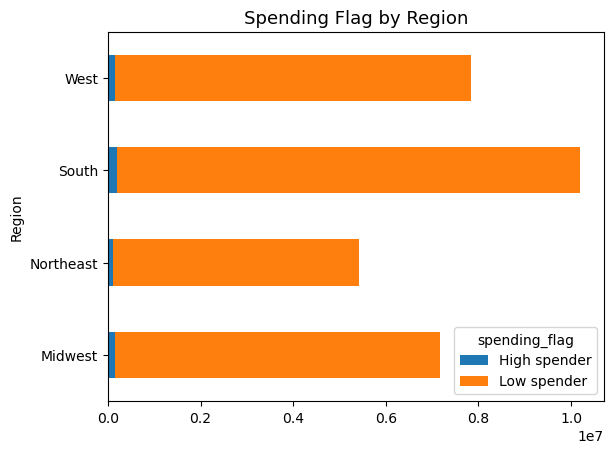

In [23]:
# Bar chart for Region and spending_flag
bar_region_spending_flag_counts = region_spending_flag_counts.plot.barh(stacked=True)
plt.title('Spending Flag by Region',fontsize=13)
plt.xlabel('')

In [24]:
bar_region_spending_flag_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_spending_flags.png'))

In [25]:
# Group Region and order_frequency_flag
region_order_frequency_flag_counts = cust_ords_prods_merge.groupby(['Region','order_frequency_flag']).size().unstack(fill_value=0)

In [26]:
# Bar chart for Region and order_frequency_flag
bar_region_order_frequency_flag = region_order_frequency_flag_counts.plot.bar(stacked=True)
plt.title('Frequency of Orders by Region',fontsize=13)
plt.xlabel('')

Text(0.5, 0, '')

In [27]:
bar_region_order_frequency_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_order_frequency_flag_2.png'))

In [60]:
#pie chart on Region
pie_Region = cust_ords_prods_merge['Region'].value_counts().plot.pie(figsize = (8,8), 
                                                                colors = sns.color_palette('Reds', 4), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Regions',fontsize=13)
plt.show()

In [61]:
pie_Region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_Region.png'))

## Customer Profiling - Age range

In [28]:
cust_ords_prods_merge['age'].min()

18

In [30]:
# Create a profile variable for age
cust_ords_prods_merge.loc[cust_ords_prods_merge['age'] >= 65, 'Age_group'] = 'Senior Adults'
cust_ords_prods_merge.loc[(cust_ords_prods_merge['age'] < 65) & (cust_ords_prods_merge['age'] >= 35), 'Age_group'] = 'Middle Age'
cust_ords_prods_merge.loc[cust_ords_prods_merge['age'] < 35, 'Age_group'] = 'Young Adult'



In [31]:
# Group Region and age
region_age_group = cust_ords_prods_merge.groupby(['Region','Age_group']).size().unstack(fill_value=0)

Text(0.5, 0, '')

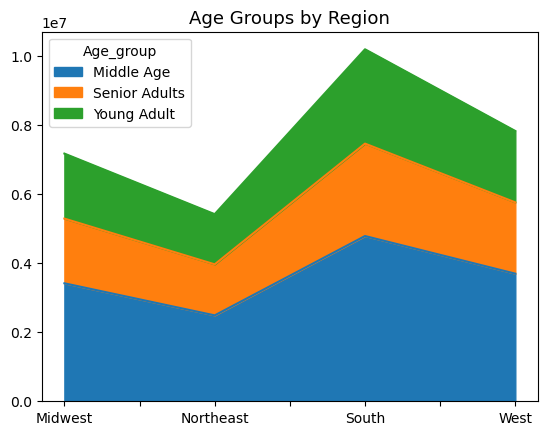

In [32]:
# Area chart for Region and age_group
area_region_age_group = region_age_group.plot.area(stacked=True)
plt.title('Age Groups by Region',fontsize=13)
plt.xlabel('')

In [33]:
area_region_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'area_region_age_group.png'))

# Income Profile

In [37]:
cust_ords_prods_merge['income'].describe()

count    3.062974e+07
mean     9.945980e+04
std      4.306626e+04
min      2.590300e+04
25%      6.706600e+04
50%      9.661200e+04
75%      1.279340e+05
max      5.939010e+05
Name: income, dtype: float64

In [38]:
cust_ords_prods_merge['income'].mean()

99459.79820537823

In [39]:
# Create a profile for income
cust_ords_prods_merge.loc[cust_ords_prods_merge['income'] >= 125000, 'income_bracket'] = 'Higher Income'
cust_ords_prods_merge.loc[(cust_ords_prods_merge['income'] < 125000) & (cust_ords_prods_merge['income'] >= 70000), 'income_bracket'] = 'Middle Income'
cust_ords_prods_merge.loc[cust_ords_prods_merge['income'] < 70000, 'income_bracket'] = 'Lower Income'


In [42]:
cust_ords_prods_merge['income_bracket'].value_counts(dropna = False)

Middle Income    13974114
Lower Income      8491711
Higher Income     8163916
Name: income_bracket, dtype: int64

In [43]:
bar_income_bracket = cust_ords_prods_merge['income_bracket'].value_counts().plot.bar(color = 'teal', title = 'Orders by Income Bracket')

In [45]:
# Export
bar_income_bracket.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_bracket.png'))

# Department visualisation

In [46]:
# Bar chart distribution of orders by department id
bar_depart_orders = cust_ords_prods_merge['department_id'].value_counts().plot.bar(color = 'palevioletred')

In [47]:
# Create new variable for department names 
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 1, 'Department'] = 'frozen'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 2, 'Department'] = 'other'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 3, 'Department'] = 'bakery'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 4, 'Department'] = 'produce'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 5, 'Department'] = 'alcohol'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 6, 'Department'] = 'international'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 7, 'Department'] = 'beverages'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 8, 'Department'] = 'pets'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 9, 'Department'] = 'dry goods'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 10, 'Department'] = 'bulk'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 11, 'Department'] = 'personal care'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 12, 'Department'] = 'meat/seafood'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 13, 'Department'] = 'pantry'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 14, 'Department'] = 'breakfast'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 15, 'Department'] = 'canned goods'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 16, 'Department'] = 'dairy'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 17, 'Department'] = 'household'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 18, 'Department'] = 'babies'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 19, 'Department'] = 'snacks'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 20, 'Department'] = 'deli'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department_id'] == 21, 'Department'] = 'missing'


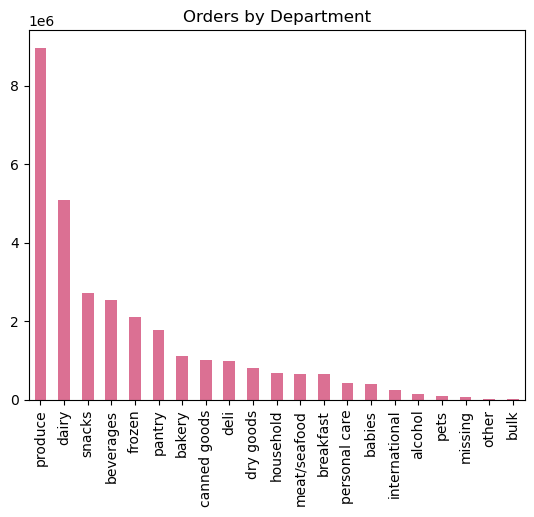

In [48]:
bar_depart_orders = cust_ords_prods_merge['Department'].value_counts().plot.bar(color = 'palevioletred', title = 'Orders by Department')

In [49]:
# Export bar chart
bar_depart_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_depart_orders.png'))

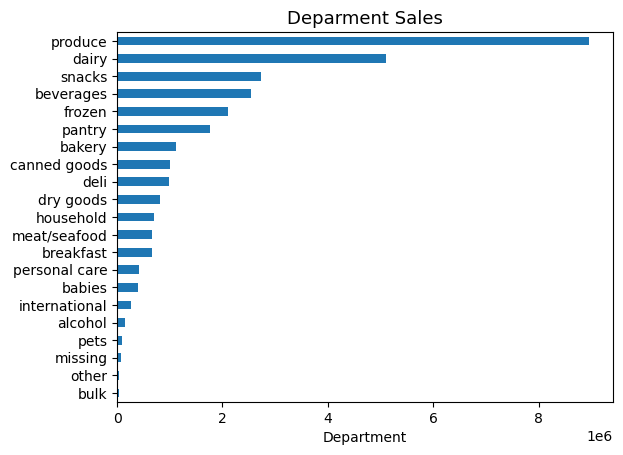

In [51]:
#bar chart for Department purchases
bar_dept_2 = cust_ords_prods_merge['Department'].value_counts().sort_values().plot.barh()
plt.ylabel('')
plt.xlabel('Department')
plt.title('Deparment Sales',fontsize=13)
plt.show()

In [52]:
bar_dept_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_purchases_2.png'))

# Dependents profile

In [54]:
# Create a profile if the customers have dependents or not
cust_ords_prods_merge.loc[cust_ords_prods_merge['number_of_dependants'] == 0, 'Dependents'] = 'No dependents'
cust_ords_prods_merge.loc[cust_ords_prods_merge['number_of_dependants'] >= 1, 'Dependents'] = 'Has dependents'

In [55]:
cust_ords_prods_merge['Dependents'].value_counts(dropna = False)

Has dependents    22980043
No dependents      7649698
Name: Dependents, dtype: int64

In [56]:
bar_dependents = cust_ords_prods_merge['Dependents'].value_counts().plot.bar(color = 'palegreen')

# Stacked barcharts - department and age

In [57]:
#Grouping department and age
depart_age = cust_ords_prods_merge.groupby(['Department', 'Age_group']).size().unstack(fill_value=0)

In [58]:
# Plot grouped data as stacked bar chart
bar_depart_age = depart_age.plot.bar(stacked=True, title='Age Distribution by Department')

In [59]:
# Export
bar_depart_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_depart_age.png'))

# Stacked barcharts - department by income bracket

In [62]:
#Grouping department and income bracket
depart_income = cust_ords_prods_merge.groupby(['Department', 'income_bracket']).size().unstack(fill_value=0)

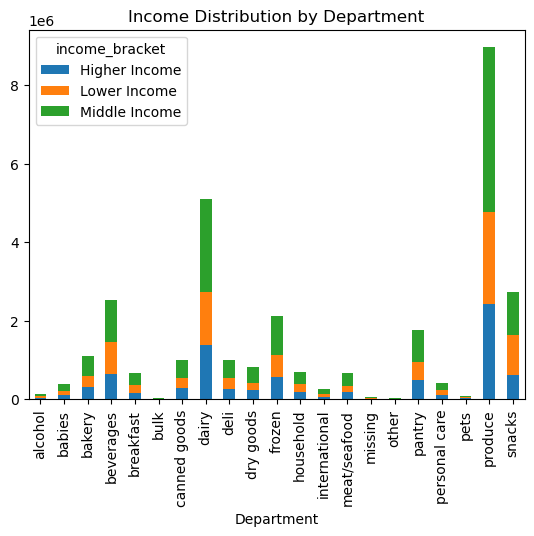

In [63]:
# Plot grouped data as stacked bar chart
bar_depart_income = depart_income.plot.bar(stacked=True, title='Income Distribution by Department')

In [64]:
# Export
bar_depart_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_depart_income.png'))

# Stacked barcharts - department by dependents

In [65]:
cust_ords_prods_merge.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'order_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price', 'spending_flag', 'median_prior_orders',
       'order_frequency_flag', 'Region', 'Age_group', 'income_bracket',
       'Department', 'Dependents'],
      dtype='object')

In [66]:
#Grouping department and dependents
depart_dependents = cust_ords_prods_merge.groupby(['Department', 'Dependents']).size().unstack(fill_value=0)

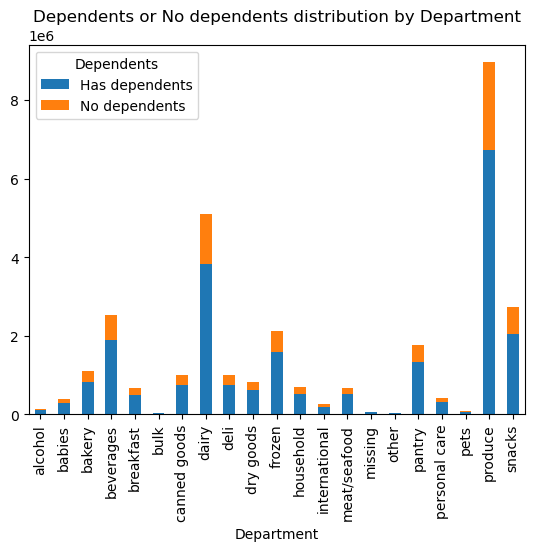

In [67]:
# Plot grouped data as stacked bar chart
bar_depart_depend = depart_dependents.plot.bar(stacked=True, title = 'Dependents or No dependents distribution by Department')

In [68]:
# Export
bar_depart_depend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_depart_depend.png'))

# Family status visualisations

In [69]:
cust_ords_prods_merge['marital_status'].value_counts(dropna = False)

married                             21509211
single                               5019732
divorced/widowed                     2629966
living with parents and siblings     1470832
Name: marital_status, dtype: int64

In [71]:
bar_fam_stat = cust_ords_prods_merge['marital_status'].value_counts().plot.bar(color = 'Gray', title = 'Orders by Family Status')

In [72]:
# Export 
bar_fam_stat.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_fam_stat.png'))

# Pie charts to show customer profiles

In [73]:
cust_ords_prods_merge['Age_group'].value_counts(dropna = False)

Middle Age       14392922
Young Adult       8139248
Senior Adults     8097571
Name: Age_group, dtype: int64

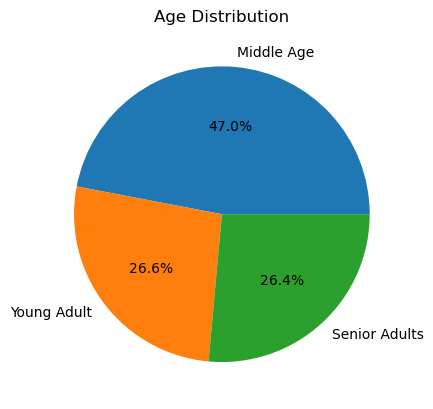

In [90]:
# Pie chart for age group demographic
age_group = 'Middle Age', 'Young Adult', 'Senior Adults'
sizes = [14392922, 8139248, 8097571]

plt.pie(sizes, labels = age_group, autopct='%1.1f%%')
plt.title('Age Distribution')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie_age.png'))
plt.show()

In [86]:
#export
pie_Region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie_age.png'))

In [76]:
cust_ords_prods_merge['income_bracket'].value_counts(dropna = False)

Middle Income    13974114
Lower Income      8491711
Higher Income     8163916
Name: income_bracket, dtype: int64

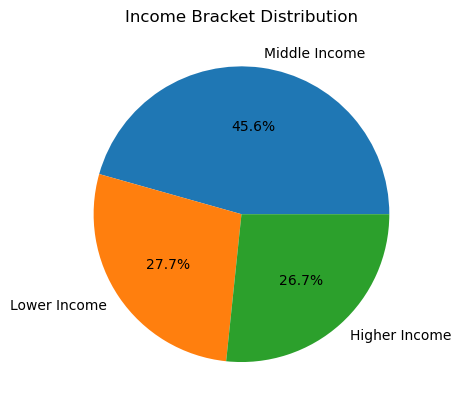

In [89]:
# Pie chart for income demographic
income = 'Middle Income', 'Lower Income', 'Higher Income'
sizes = [13974114, 8491711, 8163916]

plt.pie(sizes, labels = income, autopct='%1.1f%%')
plt.title('Income Bracket Distribution')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie_income.png'))
plt.show()

In [81]:
cust_ords_prods_merge['Dependents'].value_counts(dropna = False)

Has dependents    22980043
No dependents      7649698
Name: Dependents, dtype: int64

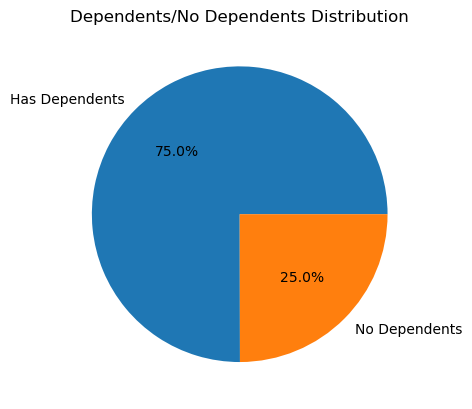

In [88]:
# Pie chart for dependents demographic
dependents = 'Has Dependents', 'No Dependents'
sizes = [22980043, 7649698]

plt.pie(sizes, labels = dependents, autopct='%1.1f%%')
plt.title('Dependents/No Dependents Distribution')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie_dependents.png'))
plt.show()

## Aggreations

In [91]:
# age and spending aggregations
cust_ords_prods_merge.groupby('Age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
Age_group                         
Middle Age     7.791580  1.0  25.0
Senior Adults  7.797187  1.0  25.0
Young Adult    7.787264  1.0  25.0

In [92]:
# income and spending aggregations
cust_ords_prods_merge.groupby('income_bracket').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
income_bracket                     
Higher Income   7.956838  1.0  25.0
Lower Income    7.352350  1.0  25.0
Middle Income   7.962735  1.0  25.0

In [93]:
# dependents and spending aggregations
cust_ords_prods_merge.groupby('Dependents').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
Dependents                         
Has dependents  7.792702  1.0  25.0
No dependents   7.789555  1.0  25.0

In [95]:
# age and usage frequency aggregations
cust_ords_prods_merge.groupby('Age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                mean  min   max
Age_group                                      
Middle Age                 11.114926  0.0  30.0
Senior Adults              11.080959  0.0  30.0
Young Adult                11.132158  0.0  30.0

In [97]:
# income and usage frequency aggregations
cust_ords_prods_merge.groupby('income_bracket').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                 mean  min   max
income_bracket                                  
Higher Income               11.028248  0.0  30.0
Lower Income                11.290482  0.0  30.0
Middle Income               11.049773  0.0  30.0

In [98]:
# dependents and usage frequency aggregations
cust_ords_prods_merge.groupby('Dependents').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                 mean  min   max
Dependents                                      
Has dependents              11.119048  0.0  30.0
No dependents               11.084925  0.0  30.0

## Regional Grouping of customer profiles

In [99]:
#Grouping age and region
age_region = cust_ords_prods_merge.groupby(['Region', 'Age_group']).size().unstack(fill_value=0)

In [100]:
# Stacked bar chart
age_region_bar = age_region.plot.bar(stacked = True, title = 'Age distribution by Region')

In [102]:
#Export 
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region_bar.png'))

In [103]:
#Grouping income and region
income_region = cust_ords_prods_merge.groupby(['Region', 'income_bracket']).size().unstack(fill_value=0)

In [104]:
# Stacked bar chart
income_region_bar = income_region.plot.bar(stacked = True, title = 'Income distribution by Region')

In [105]:
#Export 
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_region_bar.png'))

In [106]:
#Grouping dependents and region
dependents_region = cust_ords_prods_merge.groupby(['Region', 'Dependents']).size().unstack(fill_value=0)

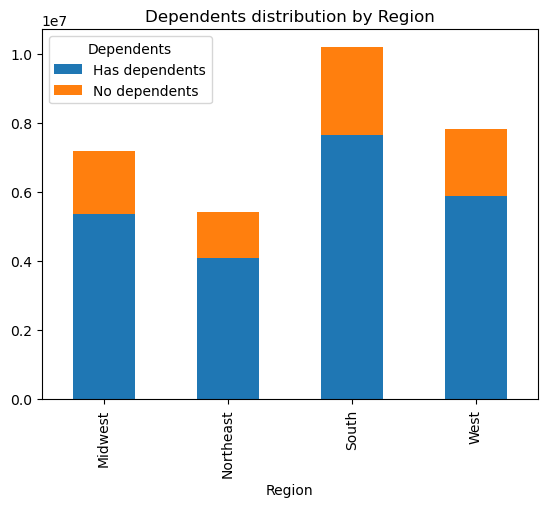

In [107]:
# Stacked bar chart
dependents_region_bar = dependents_region.plot.bar(stacked = True, title = 'Dependents distribution by Region')

In [108]:
#Export 
dependents_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependents_region_bar.png'))

## histogram of the “order_hour_of_day” column. 

In [109]:
# Group family_status and order_hour_of_day
family_status_ohod_group = cust_ords_prods_merge.groupby(['order_hour_of_day', 'marital_status']).size().unstack(fill_value=0)

In [111]:
# Bar chart for family_status and order_hour_of_day
bar_family_status_ohod_group_1 = family_status_ohod_group.plot.bar(y='married', rot=0, color="Orange")
plt.title('Orders Hour of Day by Family Status',fontsize=13)
plt.xlabel('')

Text(0.5, 0, '')

In [112]:
bar_family_status_ohod_group_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_status_ohod_group_1.png'))

In [113]:
# Bar chart for family_status and order_hour_of_day
bar_family_status_ohod_group_2 = family_status_ohod_group.plot.bar(y='single', rot=0, color="Red")
plt.title('Orders Hour of Day by Family Status',fontsize=13)
plt.xlabel('')

Text(0.5, 0, '')

In [114]:
bar_family_status_ohod_group_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_status_ohod_group_2.png'))

Text(0.5, 0, '')

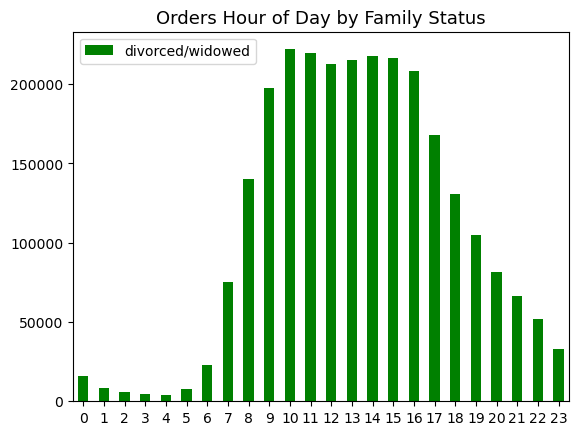

In [115]:
# Bar chart for family_status and order_hour_of_day
bar_family_status_ohod_group_3 = family_status_ohod_group.plot.bar(y='divorced/widowed', rot=0, color="Green")
plt.title('Orders Hour of Day by Family Status',fontsize=13)
plt.xlabel('')

In [116]:
bar_family_status_ohod_group_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_status_ohod_group_3.png'))

Text(0.5, 0, '')

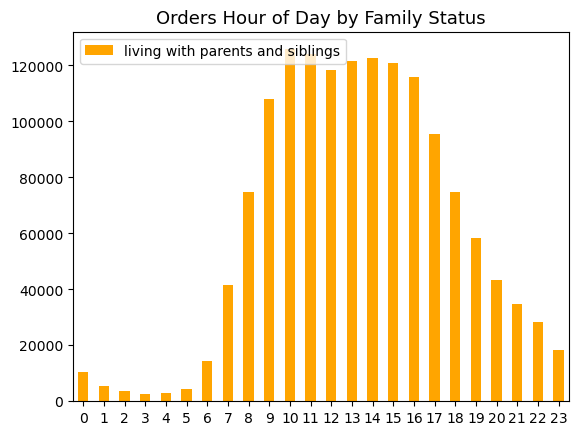

In [117]:
# Bar chart for family_status and order_hour_of_day
bar_family_status_ohod_group_4 = family_status_ohod_group.plot.bar(y='living with parents and siblings', rot=0, color="Orange")
plt.title('Orders Hour of Day by Family Status',fontsize=13)
plt.xlabel('')

In [118]:
bar_family_status_ohod_group_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_status_ohod_group_4.png'))

In [123]:
# Group family_status and spending_flag
family_status_spending_flag_group = cust_ords_prods_merge.groupby(['spending_flag', 'marital_status']).size().unstack(fill_value=0)

Text(0.5, 0, '')

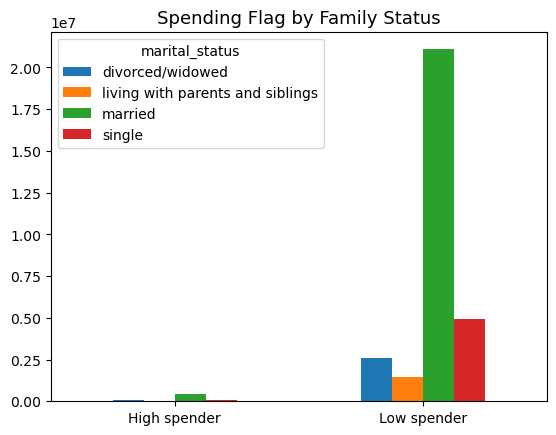

In [124]:
# Bar chart for family_status and spending_flag
bar_family_status_spending_flag_group = family_status_spending_flag_group.plot.bar(stacked=False, rot=0)
plt.title('Spending Flag by Family Status',fontsize=13)
plt.xlabel('')

In [125]:
bar_family_status_spending_flag_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_status_spending_flag_group.png'))

In [126]:
# Group family_status and order_frequency_flag
family_status_order_frequency_flag_group = cust_ords_prods_merge.groupby(['order_frequency_flag', 'marital_status']).size().unstack(fill_value=0)

In [127]:
# Bar chart for family_status and order_frequency_flag
bar_family_status_order_frequency_flag_group = family_status_order_frequency_flag_group.plot.bar(stacked=False, rot=0)
plt.title('Order Frequency by Family Status',fontsize=13)
plt.xlabel('')

Text(0.5, 0, '')

In [128]:
bar_family_status_spending_flag_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_status_spending_flag_group.png'))

In [669]:
pie_price_range_loc.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_price_range_loc.png'))

# 11 Loyalty groups

In [129]:
# Group loyalty_flag and order_frequency_flag
loyalty_frequency_group = cust_ords_prods_merge.groupby(['loyalty_flag','order_frequency_flag']).size().unstack(fill_value=0)

In [130]:
# Bar chart for loyalty_flag and order_frequency_flag
bar_loyalty_frequency_group = loyalty_frequency_group.sort_values(['loyalty_flag']).plot.barh(stacked=True)
plt.title('Order Frequency by Loyalty Group',fontsize=13)
plt.xlabel('')
plt.ylabel('')
plt.yticks(rotation = 45, fontsize=7)

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(0, 1, 'New customer'),
  Text(0, 2, 'Regular customer')])

In [131]:
bar_loyalty_frequency_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_frequency_group.png'))

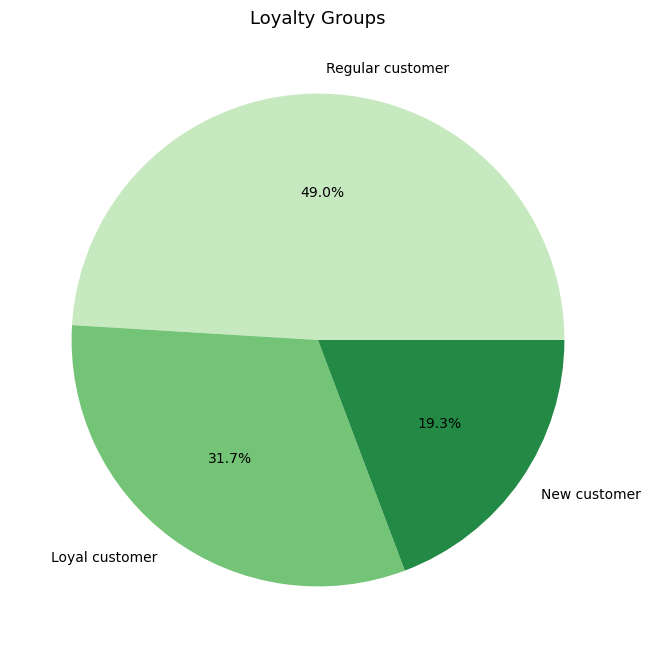

In [132]:
#pie chart on price_range_loc
pie_loyalty_flag = cust_ords_prods_merge['loyalty_flag'].value_counts().plot.pie(figsize = (8,8), 
                                                                colors = sns.color_palette('Greens', 3), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Loyalty Groups',fontsize=13)
plt.show()

In [133]:
pie_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_loyalty_flag.png'))

# Order frequency

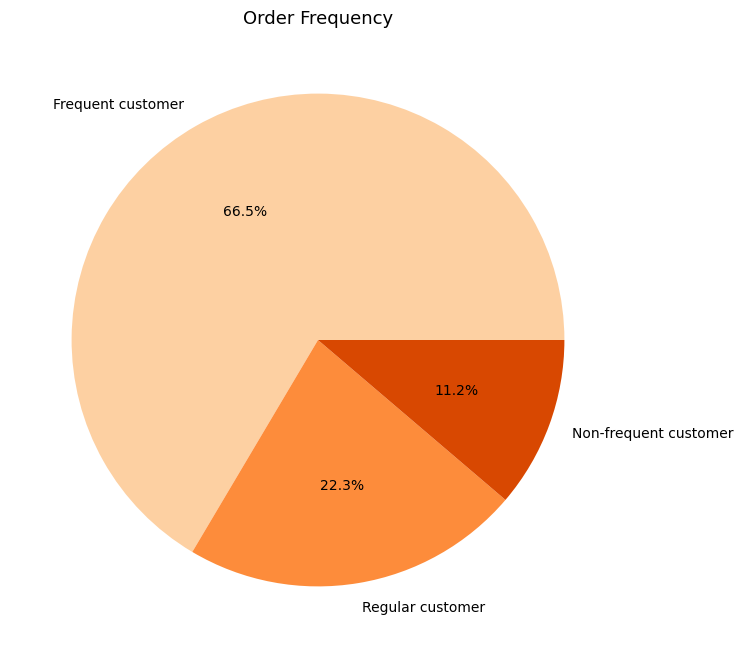

In [134]:
#pie chart on order_frequency_flag
pie_order_frequency_flag = cust_ords_prods_merge['order_frequency_flag'].value_counts().plot.pie(figsize = (8,8), 
                                                                colors = sns.color_palette('Oranges', 3), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Order Frequency',fontsize=13)
plt.show()

In [135]:
pie_order_frequency_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_order_frequency_flag.png'))

# Spending groups 

In [136]:
#pie chart on spending_flag
pie_spending_flag = cust_ords_prods_merge['spending_flag'].value_counts().plot.pie(figsize = (8,8), 
                                                                colors = sns.color_palette('Blues', 2), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Spending Groups',fontsize=13)
plt.show()

In [137]:
pie_spending_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_spending_flag.png'))

In [138]:
# Export cust_ords_prods_merge dataset as pickle
cust_ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'cust_orders_products_merged_Task_4_10_FinalDataSet.pkl'))